In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from scipy import ndimage
# from PIL import Image,ImageChops
# from colours import color_analysis1
import math 
import os
import glob 
import random

In [3]:
df=pd.read_csv('/Users/varsha/Desktop/Capstone project/resp2.csv')
print(df.head())
list(df.columns)
df.shape

   ID  Tinea captisis  Alopecia areata  Melanoma  Healthy scalp      Img
0  48               0                1         0              0  48.jpeg
1  49               0                1         0              0  49.jpeg
2  50               0                1         0              0  50.jpeg
3  51               0                1         0              0  51.jpeg
4  52               0                1         0              0  52.jpeg


(46, 6)

In [65]:
import os
import glob 
img_dir = "/Users/varsha/Desktop/Capstone project/images_2" 
# Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
data = [] 

In [66]:
for i in range(48,94):
    for f1 in files:
        tmp=f1.split("/")
        n=tmp[-1].split(".")    
        if(i==int(n[0])):
            img = cv2.imread(f1) 
            img=cv2.resize(img, (560, 560))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            data.append(img)
            break

df['pic']=data
print(df.head())

   ID  Tinea captisis  Alopecia areata  Melanoma  Dandruff  Healthy scalp  \
0  48               0                1         0         0              0   
1  49               0                1         0         0              0   
2  50               0                1         0         0              0   
3  51               0                1         0         0              0   
4  52               0                1         0         0              0   

       Img                                                pic  
0  48.jpeg  [[[166, 137, 124], [166, 137, 124], [148, 119,...  
1  49.jpeg  [[[47, 48, 53], [47, 48, 53], [46, 47, 53], [4...  
2  50.jpeg  [[[31, 24, 24], [31, 23, 23], [29, 22, 22], [2...  
3  51.jpeg  [[[162, 164, 128], [162, 164, 128], [161, 163,...  
4  52.jpeg  [[[200, 177, 173], [200, 177, 173], [199, 176,...  


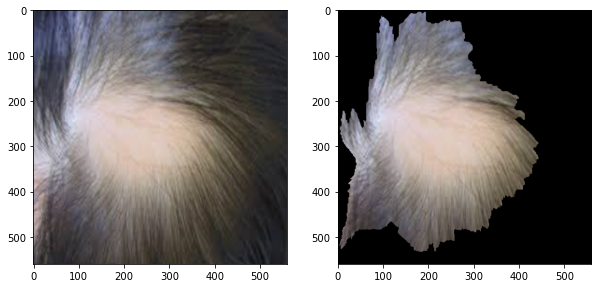

True

In [57]:
#segmentation
img=data[45]
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (1,1,545,545) #rect = (start_x, start_y, width, height)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
fimg = img*mask2[:,:,np.newaxis]


fig=plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(121)
ax1.imshow(img)

ax2 = fig.add_subplot(122)
ax2.imshow(fimg)

#plt.colorbar()
plt.show()

fimg=cv2.cvtColor(fimg,cv2.COLOR_BGR2RGB)
cv2.imwrite('/Users/varsha/Desktop/Capstone project/segmented_2/s92.jpg', fimg) 

   ID  Tinea captisis  Alopecia areata  Melanoma  Healthy scalp      Img  \
0  48               0                1         0              0  48.jpeg   
1  49               0                1         0              0  49.jpeg   
2  50               0                1         0              0  50.jpeg   
3  51               0                1         0              0  51.jpeg   
4  52               0                1         0              0  52.jpeg   

                                       segmented_img  
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
   ID  Tinea captisis  Alopecia areata  Melanoma  Healthy scalp      Img  \
0  48               0                1         0              0  48.jpeg   
1  49               0                1         0             

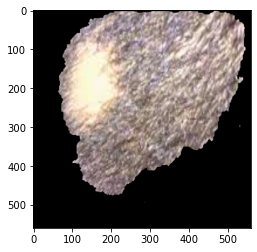

In [4]:
#convert to gray-but not happening, so cool
img_dir = "/Users/varsha/Desktop/Capstone project/segmented_2" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
data = [] 

for i in range(47,94):
    for f1 in files:
        tmp=f1.split("/")
        a=tmp[-1].split("s")
        b=a[1].split(".")
        n=b[0]
        if(i==int(n)):
            img = cv2.imread(f1) 
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            data.append(img)
            break
        
df['segmented_img']=data
print(df.head())

img=df['segmented_img'][0]
plt.imshow(img)
plt.imshow(img,cmap="gray")



#ilter
kernel = np.array([[ 1, 1, 1,1,1],
                        [ 1, 1, 1,1,1],
                        [ 1, 1, 1,1,1],
                        [1, 1, 1,1,1], 
                        [1, 1, 1,1,1]
                       ])

print(df.head())
#Area
area=[]
for img in df['segmented_img']:
    cnt=0
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.filter2D(img, -1, kernel)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[0]):
            if(img[i][j]!=0):
                cnt+=1

    area.append(cnt)

df['area']=area
print(df.head())



#width & height & ratio
central_width=[]
central_height=[]
height_width_ratio=[]
mid_x=280
mid_y=280
for img in df['segmented_img']:
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #img=cv2.filter2D(img, -1, kernel)
    left=0
    right=0
    top=0
    bot=0
    for i in range(mid_x,0,-1):
        if(img[mid_x][i]!=0):
            left+=1
            
    for j in range(mid_x,560):
        if(img[mid_x][j]!=0):
            right+=1
    
    for k in range(mid_y,0,-1):
        if(img[k][mid_y]!=0):
            top+=1
            
    for l in range(mid_y,560):
        if(img[l][mid_y]!=0):
            bot+=1
    
    h=top+bot           
    w=left+right
    h_w=h/w
    height_width_ratio.append(h_w)
    central_width.append(w)
    central_height.append(h)
    
df['height_width_ratio']=height_width_ratio
df['central_width']=central_width
df['central_height']=central_height
print(df.head())

#Smaller-Half-distance, Circle Area, Square Area
smaller_half_dist=[]
circle_area=[]
circle_area_ratio=[]
square_area=[]
square_area_ratio=[]
small=0
circ_a=0

for a in df.index: 
    small=min(df['central_width'][a],df['central_height'][a])
    shd=small/2
    circ_a=math.pi*(shd**2)
    circ_a_rat=circ_a/df['area'][a]
    square_a=4*(shd**2)
    square_a_rat=square_a/df['area'][a]
    square_area.append(square_a)
    square_area_ratio.append(square_a_rat)
    smaller_half_dist.append(shd)
    circle_area.append(circ_a)
    circle_area_ratio.append(circ_a_rat)
    

df['smaller_half_dist']=smaller_half_dist
df['circle_area']=circle_area
df['circle_area_ratio']=circle_area_ratio
print(df.head())

In [31]:
#hough tranform to count the number of lines-check if you should with segmented/ normal okay?
import cv2

lines = []
image = cv2.imread('/Users/varsha/Desktop/Capstone project/Images1/3.jpeg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

lines = 0
for c in cnts:
    cv2.drawContours(image, [c], -1, (36,255,12), 3)
    lines += 1

df['lines']=lines
print(lines)
#cv2.imshow('thresh', thresh)
#cv2.imshow('image', image)
#cv2.waitKey()

234


In [ ]:
#skeletonization- just image- see if you should count lines with this
import cv2
import numpy as np

img = cv2.imread('/Users/varsha/Desktop/s2.jpg',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

cv2.imshow("skel",skel)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#colour - got rbg values, put that inside a new colour column- explanation can be that we can get the closest value, but its best to use rbg values for scalp, or we can put our own range
from PIL import Image
 
def most_common_used_color(img):
    # Get width and height of Image
    width, height = img.size
 
    # Initialize Variable
    r_total = 0
    g_total = 0
    b_total = 0
 
    count = 0
 
    # Iterate through each pixel
    for x in range(0, width):
        for y in range(0, height):
            # r,g,b value of pixel
            r, g, b = img.getpixel((x, y))
 
            r_total += r
            g_total += g
            b_total += b
            count += 1
 
    return (r_total/count, g_total/count, b_total/count)
 
# Read Image
img = Image.open('/Users/varsha/Desktop/Capstone project/Images1/3.jpeg')
 
# Convert Image into RGB
img = img.convert('RGB')
 
# call function
common_color = most_common_used_color(img)
 
print(common_color)
# Output is (R, G, B)

In [5]:
df.to_csv (r'/Users/varsha/Desktop/Capstone project/2.csv', index = False, header=True)